In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.shape

(6435, 8)

In [4]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

### Which store has maximum sales

In [5]:
a = df.groupby(['Store'])['Weekly_Sales'].sum()

In [6]:
a.head()

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

In [7]:
print('Store with Max sale : ',a.idxmax())
print('Max Value of sale : ',a.max())

Store with Max sale :  20
Max Value of sale :  301397792.46


### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation



In [8]:
stda = df.groupby(['Store'])['Weekly_Sales'].std()

In [9]:
print('Store with max STD : ',stda.idxmax())
print('MAx Value of STD : ',stda.max())

Store with max STD :  14
MAx Value of STD :  317569.9494755081


In [10]:
st = df.groupby('Store').agg({'Weekly_Sales':['mean','std']})
st.head()

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745

### Which stores has good quarterly growth rate in Q3’2012

In [11]:
q3 = df[(pd.to_datetime(df['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(df['Date']) <= pd.to_datetime('09-30-2012'))]
q2 = df[(pd.to_datetime(df['Date']) >= pd.to_datetime('04-01-2012')) & (pd.to_datetime(df['Date']) <= pd.to_datetime('06-30-2012'))]

In [12]:
q3.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
109,1,09-03-2012,1675431.16,0,58.76,3.669,221.059189,7.348
122,1,08-06-2012,1697230.96,0,78.30,3.452,221.749484,7.143
127,1,13-07-2012,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,20-07-2012,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,27-07-2012,1439123.71,0,82.66,3.407,221.941295,6.908


In [13]:
q2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
100,1,06-01-2012,1550369.92,0,49.01,3.157,219.714258,7.348
113,1,06-04-2012,1899676.88,0,70.43,3.891,221.435611,7.143
114,1,13-04-2012,1621031.70,0,69.07,3.891,221.510210,7.143
115,1,20-04-2012,1521577.87,0,66.76,3.877,221.564074,7.143
116,1,27-04-2012,1468928.37,0,67.23,3.814,221.617937,7.143


In [14]:
q2['Date'] = pd.to_datetime(q2['Date'])

/var/folders/gw/08ys_qm54ks74dkzmn84tw880000gn/T/ipykernel_83339/3994790714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['Date'] = pd.to_datetime(q2['Date'])


In [15]:
q3['Date'] = pd.to_datetime(q3['Date'])

/var/folders/gw/08ys_qm54ks74dkzmn84tw880000gn/T/ipykernel_83339/614829840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['Date'] = pd.to_datetime(q3['Date'])


In [16]:
q2sum = q2.groupby(['Store'])['Weekly_Sales'].sum()

In [17]:
q3sum = q3.groupby(['Store'])['Weekly_Sales'].sum()

In [18]:
b = q3sum - q2sum

In [19]:
print('Store with best growth rate : ',b.idxmax())
print('The Growth of the store : ',b.max())

Store with best growth rate :  16
The Growth of the store :  -184822.33000000007


In [20]:
#we can see from the above data, that sales declined in the third quarter as compared to the second quarter

### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together



In [21]:
df['DateTime'] = pd.to_datetime(df['Date'])

In [22]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03


In [23]:
#first we will list the holidays
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [24]:
#now we will divide create a new dataframe and save the sales from holiday week
holweek = df[df['Holiday_Flag'] == 1]

In [25]:
norweek = df[df['Holiday_Flag'] == 0]

In [26]:
means = df['Weekly_Sales'].mean()

In [27]:
means

1046964.8775617732

In [28]:
sup = holweek[(holweek['Date'] == '12-02-2010') |(holweek['Date'] == '11-02-2011')|(holweek['Date'] == '10-02-2012')]

In [29]:
superbowlsales = sup['Weekly_Sales'].mean()

In [30]:
lab = holweek[(holweek['Date'] == '10-09-2010') | (holweek['Date'] == '09-09-2011') | (holweek['Date'] == '07-09-2012')]

In [31]:
labourdaysales = lab['Weekly_Sales'].mean()

In [32]:
tha = holweek[(holweek['Date'] == '26-11-2010') | (holweek['Date'] == '25-11-2011') | (holweek['Date'] == '23-11-2012')]

In [33]:
thanksgivingsales = tha['Weekly_Sales'].mean()

In [34]:
chris = holweek[(holweek['Date'] == '31-12-2010')|(holweek['Date'] == '30-12-2011')|(holweek['Date'] == '28-12-2012')]

In [35]:
christmassales = chris['Weekly_Sales'].mean()

In [36]:
#diff in sale between superbowl and avg
superbowlsales - means

32163.11014193017

In [37]:
#diff in sale between labourday and avg
labourdaysales - means

-4537.5836358474335

In [38]:
#diff in sale between thanksgiving and avg
thanksgivingsales - means

424308.5502160047

In [39]:
#diff in sale between christmas and avg
christmassales - means

-86131.76600621804

### Provide a monthly and semester view of sales in units and give insights

In [40]:
#creating a new column for years, months and quarters
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter

In [41]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime,Month,Year,Quarter
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,5,2010,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,12,2010,4


In [42]:
yr2010 = df[df['Year'] == 2010]
yr2010.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime,Month,Year,Quarter
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,5,2010,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,12,2010,4
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2,2010,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2,2010,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03,5,2010,2


In [43]:
yr2011 = df[df['Year'] == 2011]
yr2011.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime,Month,Year,Quarter
48,1,07-01-2011,1444732.28,0,48.27,2.976,211.404742,7.742,2011-07-01,7,2011,3
49,1,14-01-2011,1391013.96,0,35.40,2.983,211.457411,7.742,2011-01-14,1,2011,1
50,1,21-01-2011,1327405.42,0,44.04,3.016,211.827234,7.742,2011-01-21,1,2011,1
51,1,28-01-2011,1316899.31,0,43.83,3.010,212.197058,7.742,2011-01-28,1,2011,1
52,1,04-02-2011,1606629.58,0,42.27,2.989,212.566881,7.742,2011-04-02,4,2011,2


In [44]:
yr2012 = df[df['Year'] == 2012]
yr2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime,Month,Year,Quarter
100,1,06-01-2012,1550369.92,0,49.01,3.157,219.714258,7.348,2012-06-01,6,2012,2
101,1,13-01-2012,1459601.17,0,48.53,3.261,219.892526,7.348,2012-01-13,1,2012,1
102,1,20-01-2012,1394393.84,0,54.11,3.268,219.985689,7.348,2012-01-20,1,2012,1
103,1,27-01-2012,1319325.59,0,54.26,3.290,220.078852,7.348,2012-01-27,1,2012,1
104,1,03-02-2012,1636339.65,0,56.55,3.360,220.172015,7.348,2012-03-02,3,2012,1


Text(0.5, 1.0, 'Monthly Sale of 2010')

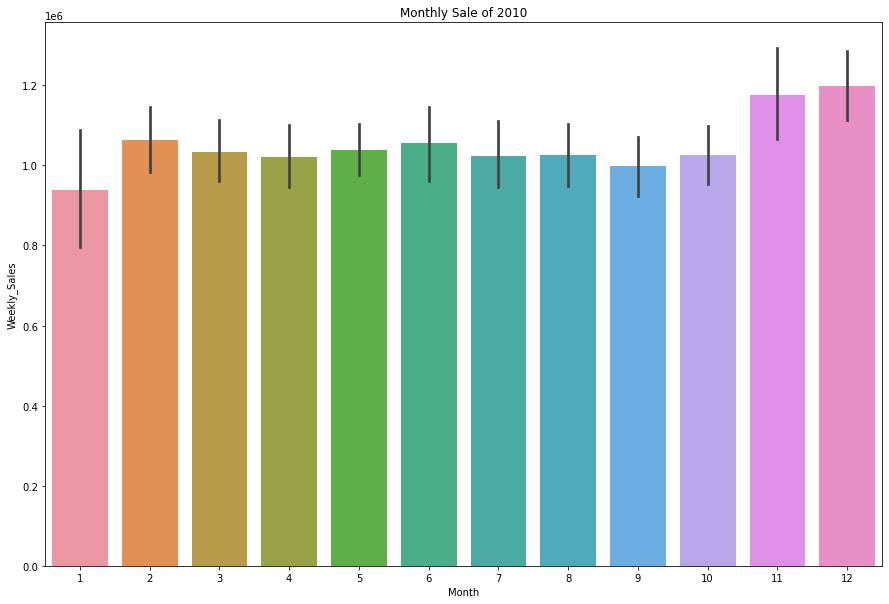

In [45]:
plt.figure(figsize = (15,10))
sns.barplot(x = yr2010['Month'],y = yr2010['Weekly_Sales'])
plt.title('Monthly Sale of 2010')

Text(0.5, 1.0, 'Monthly Sale of 2011')

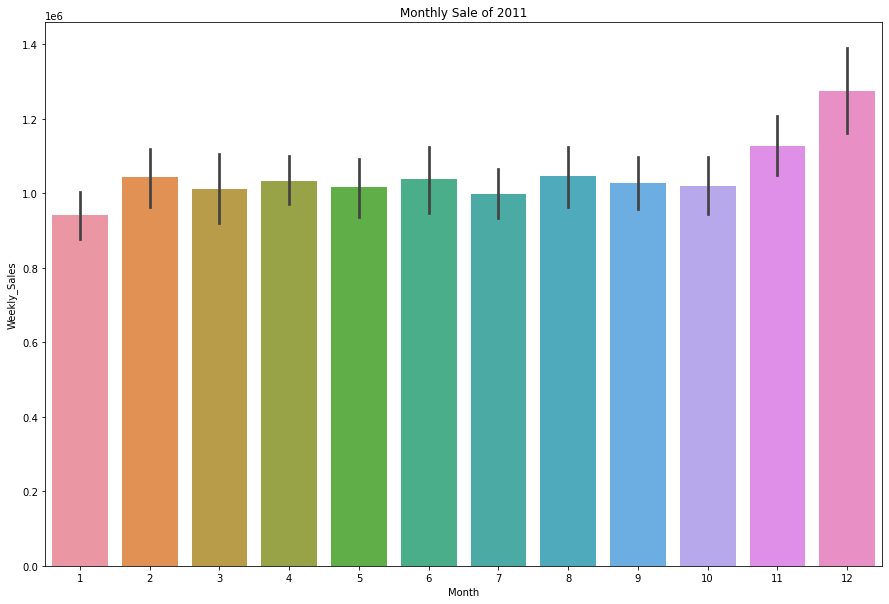

In [46]:
plt.figure(figsize = (15,10))
sns.barplot(x = yr2011['Month'],y = yr2011['Weekly_Sales'])
plt.title('Monthly Sale of 2011')

Text(0.5, 1.0, 'Monthly Sale of 2012')

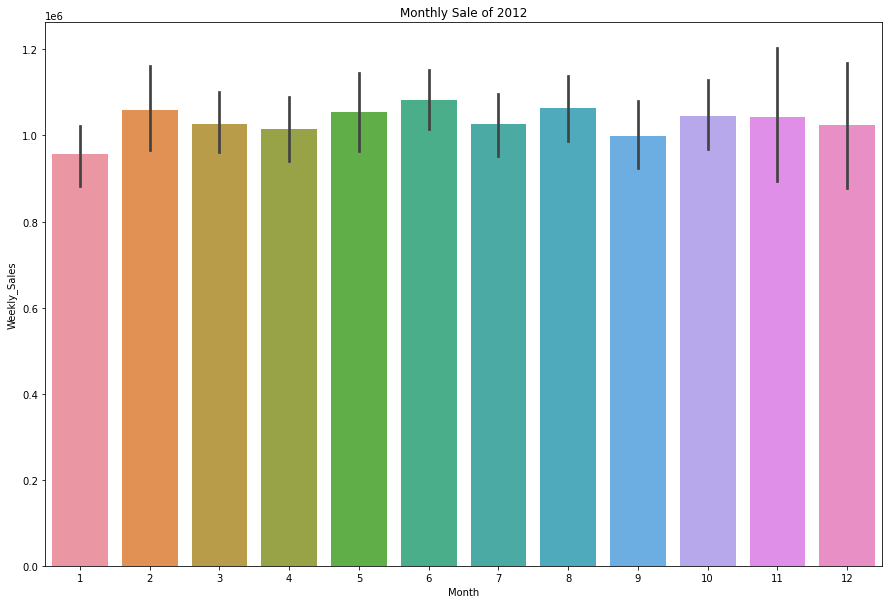

In [47]:
plt.figure(figsize = (15,10))
sns.barplot(x = yr2012['Month'],y = yr2012['Weekly_Sales'])
plt.title('Monthly Sale of 2012')

Text(0, 0.5, 'Monthly Sales')

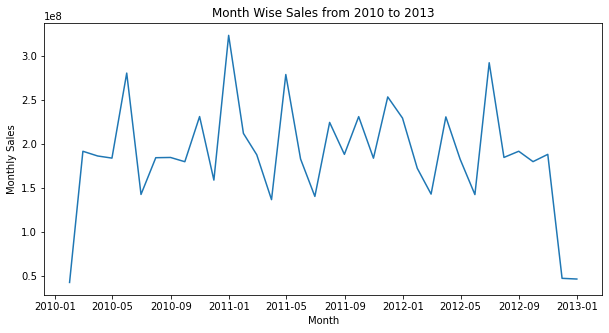

In [48]:
Monthly = df.groupby(pd.Grouper(key='DateTime', freq='1M')).sum()
Monthly = Monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,5))
X = Monthly['DateTime']
Y = Monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales from 2010 to 2013')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')

### Now giving semester wise sale

Text(0, 0.5, 'Weekly_Sales')

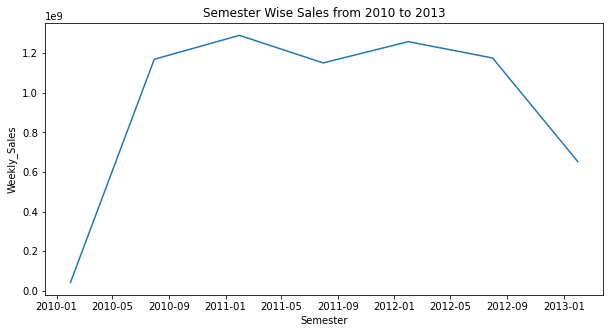

In [49]:
Semester = df.groupby(pd.Grouper(key='DateTime', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,5))
X = Semester['DateTime']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales from 2010 to 2013')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

## For Store 1 – Build  prediction models to forecast demand

### Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). 

In [50]:
store1 = df[df['Store'] == 1]

In [51]:
store1['Day'] = (store1.index) * 7

/var/folders/gw/08ys_qm54ks74dkzmn84tw880000gn/T/ipykernel_83339/3540585762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['Day'] = (store1.index) * 7


In [52]:
store1['Day'][0] = 1
store1.head()

/var/folders/gw/08ys_qm54ks74dkzmn84tw880000gn/T/ipykernel_83339/2888528272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['Day'][0] = 1


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime,Month,Year,Quarter,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,5,2010,2,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,12,2010,4,7
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2,2010,1,14
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2,2010,1,21
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03,5,2010,2,28


### Linear Regression - Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [53]:
store1lr = store1

In [54]:
store1lr.drop(columns = ['Store','Date','DateTime','Month','Year','Quarter','Day'],inplace = True)

/Users/priyanshkhandelwal/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
store1lr.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,0,42.31,2.572,211.096358,8.106
1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1611968.17,0,39.93,2.514,211.289143,8.106
3,1409727.59,0,46.63,2.561,211.319643,8.106
4,1554806.68,0,46.50,2.625,211.350143,8.106


In [56]:
store1lr.corr().style.background_gradient(cmap = 'coolwarm')

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955
Holiday_Flag,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949
Temperature,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944
CPI,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471
Unemployment,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000


In [57]:
# as we can see, the correlation of Weekly_sales with unemployment, CPI and fuel price is low, still we will 
# check the P value to confirm

In [58]:
#now we will check if there are null values
store1lr.isna().sum()

Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

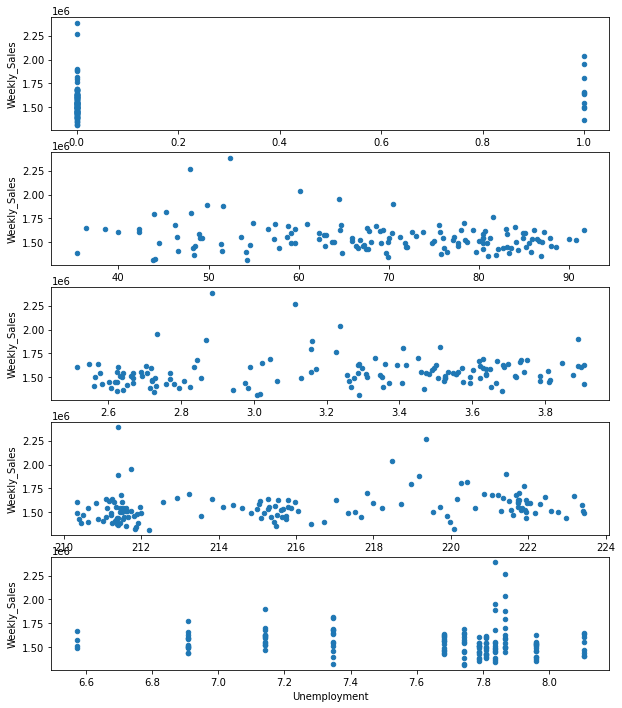

In [59]:
#first we will draw the scatterplot to check
fig,axs = plt.subplots(5,1,sharey = True)
store1lr.plot(kind = 'scatter',x = 'Holiday_Flag',y = 'Weekly_Sales',ax = axs[0],figsize = (10,12))
store1lr.plot(kind = 'scatter',x = 'Temperature',y = 'Weekly_Sales',ax = axs[1],figsize = (10,12))
store1lr.plot(kind = 'scatter',x = 'Fuel_Price',y = 'Weekly_Sales',ax = axs[2],figsize = (10,12))
store1lr.plot(kind = 'scatter',x = 'CPI',y = 'Weekly_Sales',ax = axs[3],figsize = (10,12))
store1lr.plot(kind = 'scatter',x = 'Unemployment',y = 'Weekly_Sales',ax = axs[4],figsize = (10,12))

In [60]:
#first we will divide the data in x and y variables
x = store1lr[['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
y = store1lr.Weekly_Sales
#now we will divide the data in train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 100)

In [61]:
#now we will import the linear regression model and train it
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [62]:
#now we will train it
lr.fit(xtrain,ytrain)
print(lr.intercept_)
print(lr.coef_)

-3820890.0836359607
[122370.64806455  -1683.19494611 -36571.4448082   21715.21328033
 119555.66203988]


In [63]:
#now we will make the predictions
pred = lr.predict(xtest)

In [64]:
#now we will check the mean squared error
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

In [65]:
print('Root Mean Squared error : ',sqrt(mean_squared_error(ytest,pred)))
print('10% of mean of target : ',0.1 * ytrain.mean())

Root Mean Squared error :  177211.25085710708
10% of mean of target :  155458.32867000008


In [66]:
#since RMSE should be <= 10% of mean of the target,
# we will recheck our model by finding the adjusted r2 value

In [67]:
X2 = sm.add_constant(x)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     4.815
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           0.000436
Time:                        16:45:33   Log-Likelihood:                -1900.8
No. Observations:                 143   AIC:                             3814.
Df Residuals:                     137   BIC:                             3831.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.428e+06   1.75e+06     -1.385   

/Users/priyanshkhandelwal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
#our adjusted r2 value is .11, which is not at all good
#we can drop the features with pvalue > 0.5
#but we will do ElasticNet regularizing LR on it

#### From the above table, we can confirm that Fuel_price and Unemployment does not have a lot of effect on the sales, so we can drop them

### now we will do the elastic net regularising LR on this data

In [69]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.95,0.99,1]}

elastic = GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10)

In [70]:
import warnings
warnings.filterwarnings('ignore')

elastic.fit(x,y).best_params_

{'alpha': 3, 'l1_ratio': 0.3}

In [71]:
import warnings
warnings.filterwarnings('ignore')

elastic.fit(x,y).best_score_

-22532461081.296345

In [72]:
print('RMSE : ',sqrt(-elastic.fit(x,y).best_score_))

RMSE :  150108.16460571473


In [73]:
print('10% of mean of target : ',0.1 * ytrain.mean())

10% of mean of target :  155458.32867000008


### As we can see, the RMSE has decreased by quite a lot, but we can still go further and check for other models as well, wether the RMSE will decrese or not

#### Now we will try the decision tree regressor

In [74]:
store1.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.555264e+06,0.069930,68.306783,3.219699,215.996892,7.610420
std,1.559808e+05,0.255926,14.250486,0.427313,4.350890,0.383749
min,1.316899e+06,0.000000,35.400000,2.514000,210.337426,6.573000
25%,1.458105e+06,0.000000,58.265000,2.764500,211.549277,7.348000
50%,1.534850e+06,0.000000,69.640000,3.290000,215.459905,7.787000
75%,1.614892e+06,0.000000,80.485000,3.594000,220.531330,7.838000
max,2.387950e+06,1.000000,91.650000,3.907000,223.444251,8.106000


In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 100)


from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [76]:
Tpred = reg.predict(xtest)

In [77]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, Tpred)))  

Root Mean Squared Error: 269613.25933008577


### From the above model, we can confirm that ElasticNet is the best Model for this dataset

## Change dates into days by creating new variable.

In [78]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime,Month,Year,Quarter
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,5,2010,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,12,2010,4
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2,2010,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2,2010,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03,5,2010,2


In [79]:
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()

In [80]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateTime,Month,Year,Quarter,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,5,2010,2,Sunday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,12,2010,4,Thursday
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2,2010,1,Friday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2,2010,1,Friday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03,5,2010,2,Monday
